# Ice Load Data Dam #1

In this notebook, data from ice panels at Dam #1 will be analyzed. The data is read from Google Drive. The spreadsheet should be manually filtered first so that the first row contains the name of the columns and the second row contains the unit of the data.

1. Import of Modules
2. Setup Work Directory
3. Import and Cleaning of Data
3. Visualization of Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
# To visualize dataframes import display
from IPython.display import display
# Enable plotting inside the notebook
%matplotlib inline


# Setup Work Directory
Here, a link to Google Drive and Github is established together with the work directory to the data and to store plots. A list of all data is then created.

In [2]:
#### LINK GOOGLE DRIVE AND GITHUB

# Import Google Drive
# /content/drive/MyDrive/ is the default path to the root of the Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Link Github Repository
!git clone https://github.com/AndreasSjolander/IceLoadsOnDams.git

# Create a data path
pa_da1 = 'IceLoadsOnDams/Data_Ratan'
pd_fig = 'IceLoadsOnDams/Plot_Ratan'

# Set the work directory
os.chdir(pa_da1)
print (os.listdir())


Cloning into 'IceLoadsOnDams'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 18 (delta 6), reused 7 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 2.08 MiB | 23.68 MiB/s, done.
Resolving deltas: 100% (6/6), done.
['Islast_Vinter_2016_2.xlsx']


In [3]:
#### READ IN FILES WITH NEW NAME
# Find all files of specified type defined by: filetype
filetype = '*.xlsx'
Xlist = filetype
# Create an empty vector to store filenames in
filex = []
# Store all filenames defined above
for fx in glob.glob(Xlist, recursive=True):
    filex.append(fx)
print("A list of all files \n")
print(filex)

A list of all files 

['Islast_Vinter_2016_2.xlsx']


## 3. Importing and Cleaning of Data

Data is avaible in Excel format with a timestamp in the format:

1. Read in the data from Excel - OK
2. Clean the data
2a. Find row with HMB - OK
Drop other rows that contain text - OK
Set row with HMB to index - OK2
Drop columns that don't contain load or time - OK
Translate time-signal to time-date
Done!

In [ ]:
###
# READ THE DATA TO PANDAS AND PLOT
###

""" create loop to read in data.
df_temp = A temporary Panda frame with data from simulations.
li_0 = list with all filenames without extension
df_dict = a dictionary where the filename is the key and the datapoints stored
as data
col = a list with names of the columns that should be used

pd.filter is used to filter out the interesting columns, i.e. the first column
which contain the timestamp and the HBM columns which is the data from the load
cell.
Column names are dropped since the names could be inconsistent from different
files.
"""

# Create empty dictionary to store data in
df_dict = {}
# Create empty list to store filenames in
li_0 = []
# Create a list to label columns
col = ["Time", "HMB_1", "HMB_2", "HMB_3"]
# header= None,

# Define a loop
for f in filex :
    #data = data.dropna()
    df_temp = pd.read_excel(f, skiprows=(0))
    # Drop columns that don't contain important data
    df_temp = df_temp.filter(regex='HBM|Time')
    # Drop first row (contains units)
    df_temp = df_temp.drop(labels=0, axis=0)
    # Rename column names
    df_temp.columns = col
    # Create time column and convert to correct format
    #df_temp["Time_2"] = pd.to_datetime(df_temp["Time"],format='%H:%M:%S.%f', errors='coerce')
    # Create a column for average load
    df_temp["Load_Avg"] = (df_temp.HMB_1+df_temp.HMB_2+df_temp.HMB_3)/3
    # Create a column to calculate the resultatn load
    # Code here
    # Create a column to calculate the position of the resultant
    # Code here
    # DROP FILE EXTENSION
    base, ext = os.path.splitext(f)
    li_0.append(base)
    # BUILD DICTIONARY
    df_dict[base] = df_temp

print(df_temp)



               Time      HMB_1       HMB_2       HMB_3    Load_Avg
1      42426.470081  83.138925  104.870775  115.913728  101.307809
2      42426.473553  83.138925  105.192375  115.913728  101.415009
3      42426.477025  83.109763  105.543211   115.97202  101.541665
4      42426.480498  83.372215  105.660157  116.030312  101.687561
5       42426.48397  83.430538  105.777102  116.059458  101.755699
...             ...        ...         ...         ...         ...
44165  42579.960405  86.725767  103.408958  117.254445  102.463057
44166  42579.963877   86.78409  103.467431  117.283591  102.511704
44167  42579.967373  86.813251  103.525903  117.312737   102.55063
44168  42579.970833  86.871574   103.55514  117.341883  102.589532
44169  42579.974282  86.842412  103.525903  117.341883  102.570066

[44169 rows x 5 columns]


# 4. Plotting the data
Below, the data is plotted.

<Figure size 640x480 with 0 Axes>

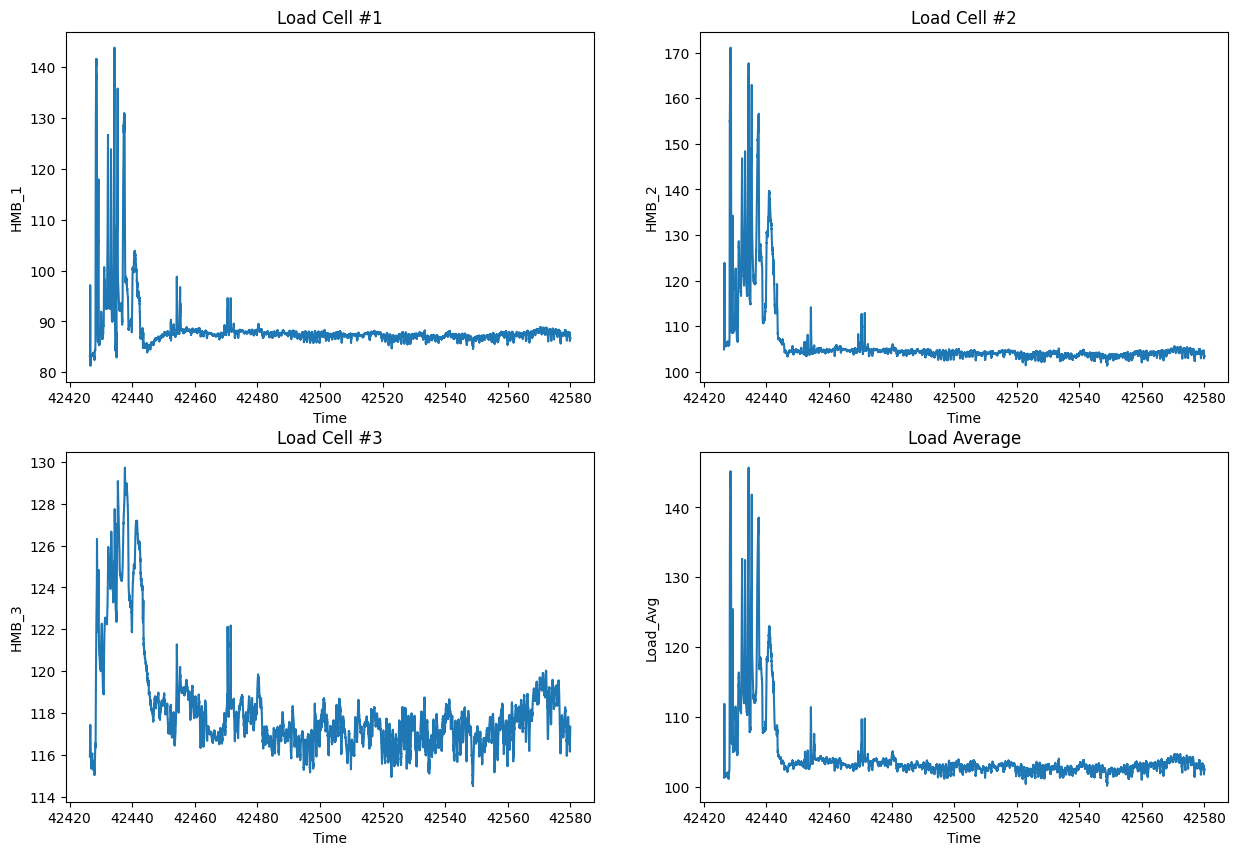

In [ ]:
# Plot the strength of the concrete for different cement and binder content and wc ratios and age
plt.figure(1)
fig, axes = plt.subplots(2, 2, figsize=(15,10))
sns.lineplot(data=df_temp, x='Time', y='HMB_1', ax=axes[0,0])
axes[0,0].set_title('Load Cell #1')
sns.lineplot(data=df_temp, x='Time', y='HMB_2', ax=axes[0,1])
axes[0,1].set_title('Load Cell #2')
sns.lineplot(data=df_temp, x='Time', y='HMB_3', ax=axes[1,0])
axes[1,0].set_title('Load Cell #3')
sns.lineplot(data=df_temp, x='Time', y='Load_Avg', ax=axes[1,1])
axes[1,1].set_title('Load Average')

plt.show()